In [1]:
from scipy import ndimage
from scipy import misc
from skimage import morphology, color
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def binary_racoon(image, threshold):
    img = image.copy()

    for i in range(len(img[:, 1])):
        for j in range(len(img[1, :])): 
            img[i,j] = img[i,j] > threshold
    return img

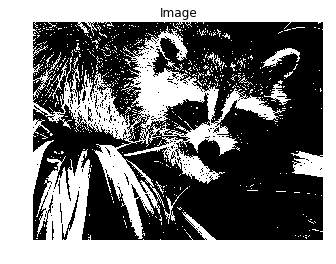

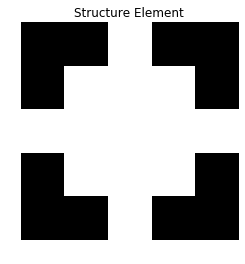

In [2]:
binary_image = binary_racoon(misc.face(gray=True), 150)
plt.imshow(binary_image, cmap=plt.cm.gray)
plt.title('Image')
plt.axis('off')
plt.show()

struct = ndimage.generate_binary_structure(2, 1)
structure_element = ndimage.iterate_structure(struct, 2)
plt.imshow(structure_element, cmap = plt.cm.gray)
plt.title('Structure Element')
plt.axis('off')
plt.show()

In [3]:
def create_image_skeleton(image, structure):
    temp_image = image
    steps = []
    while True:
        opening = ndimage.binary_opening(temp_image, structure=structure)
        is_non_zero = False
        for line in opening:
            for value in line:
                if value:
                    is_non_zero = True
                    break
        steps.append(temp_image ^ opening)
        if is_non_zero is False:
            break
        temp_image = ndimage.binary_erosion(temp_image, structure=structure)
    res = np.zeros((len(image[:, 1]), len(image[1, :])))
    for step in steps:
        res += step
    steps = np.array(steps)
    return res, steps

In [4]:
def recover_from_steps(steps, structure):
    res = np.zeros((len(steps[1, :, 1]), len(steps[1, 1, :])), bool)
    for i in range(len(steps)):
        res = res | steps[len(steps) - 1 - i]
        res = ndimage.binary_dilation(res, structure=structure)
    return res

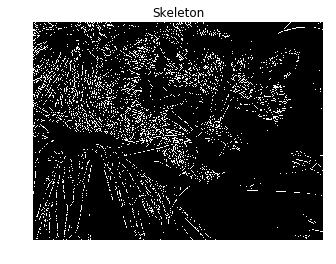

In [5]:
skeleton, steps = create_image_skeleton(binary_image, structure_element)
plt.imshow(skeleton, cmap=plt.cm.gray)
plt.title('Skeleton')
plt.axis('off')
plt.show()

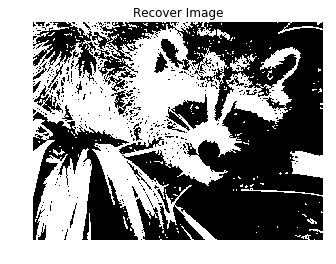

In [6]:
recover_image = recover_from_steps(steps, structure_element)
plt.imshow(recover_image, cmap=plt.cm.gray)
plt.title('Recover Image')
plt.axis('off')
plt.show()

Skeleton from library

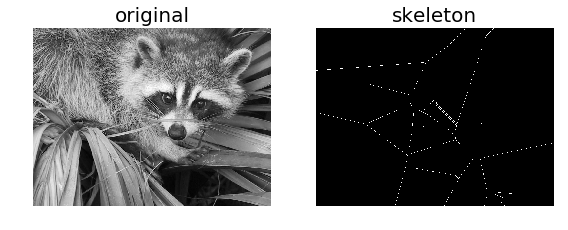

In [7]:
grey_image = misc.face(gray=True)
skeleton = morphology.medial_axis(grey_image)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax1.imshow(grey_image, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('original', fontsize=20)

ax2.imshow(skeleton, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()